Can an RNN learn to keep a clock as it's state? No input, can an RNN follow a circle?

In [262]:
# create training data

import numpy as np
import scipy.signal as sig
from numpy import linalg as LA
import matplotlib.pyplot as plt

# Create training and test data for the NN

epochs = 30000
batch_size = 1000

# number of random channels that will be trained and tested on
num_train=epochs*batch_size
num_test=batch_size

data_length = 20
omega = 1/100 # rate of rotation, number of rotations / symbol


# QPSK
data_train = np.zeros((num_train, data_length,2))
data_test = np.zeros((num_test, data_length,2))
start_train = np.zeros((num_train, 2))
start_test = np.zeros((num_test, 2))

for i in range(num_train):
    
    # first choose a random starting point on the unit circle
    # there are 2pi radians in a circle, choose random number between 0 and 2pi
    random_start = np.random.rand()*2*np.pi
#     random_start = 0
    start_train[i,:] = np.array([np.cos(random_start), np.sin(random_start)])
    # real part of data
    data_train[i,0,:]=np.array([np.cos(random_start), np.sin(random_start)])
    
    # rotate data according to omega
    for j in range(1,data_length):
        data_train[i,j,0]=(data_train[i,j-1,0]*np.cos(omega)-data_train[i,j-1,1]*np.sin(omega))
        data_train[i,j,1]=(data_train[i,j-1,0]*np.sin(omega)+data_train[i,j-1,1]*np.cos(omega))
        
    if i % 100000 == 0:
        print(i)
    

for i in range(num_test):
    # first choose a random starting point on the unit circle
    # there are 2pi radians in a circle, choose random number between 0 and 2pi
    random_start = np.random.rand()*2*np.pi
#     random_start = 0 
    start_test[i,:]=np.array([np.cos(random_start), np.sin(random_start)])
    # real part of data
    data_test[i,0,:]=np.array([np.cos(random_start), np.sin(random_start)])
    
    # rotate data according to omega
    for j in range(1,data_length):
        data_test[i,j,0]=(data_test[i,j-1,0]*np.cos(omega)-data_test[i,j-1,1]*np.sin(omega))
        data_test[i,j,1]=(data_test[i,j-1,0]*np.sin(omega)+data_test[i,j-1,1]*np.cos(omega))

print("Data generation complete.")

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000
10000000
10100000
10200000
10300000
10400000
10500000
10600000
10700000
10800000
10900000
11000000
11100000
11200000
11300000
11400000
11500000
11600000
11700000
11800000
11900000
12000000
12100000
12200000
12300000

In [3]:
import numpy as np
import scipy.signal as sig
from numpy import linalg as LA
import matplotlib.pyplot as plt

random_start = np.random.rand()*2*np.pi
print(random_start)

np.array([np.cos(random_start), np.sin(random_start)])

plt.figure()
# plot unit circle
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), linewidth=1)

k = 5

# plot the movement
for i in range(data_length):
    plt.plot(data_train[k,i,0],data_train[k,i,1], 'go')

plt.gca().set_aspect('equal', adjustable='box')
plt.show()

5.607843270062445


NameError: name 'data_length' is not defined

In [281]:
import tensorflow as tf

# pertrub weights by random number between -delta and delta
delta = 0.9

np.random.uniform(-delta,delta)

w1 = ([[np.cos(omega)+np.random.uniform(-delta,delta),-np.sin(omega)+np.random.uniform(-delta,delta)],
       [np.sin(omega)+np.random.uniform(-delta,delta), np.cos(omega)+np.random.uniform(-delta,delta)]])
b1 = ([[np.random.uniform(-delta,delta),np.random.uniform(-delta,delta)]])

w1_init = tf.constant_initializer(w1)
b1_init = tf.constant_initializer(b1)

In [282]:
import numpy as np
from numpy import linalg as LA
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
# fix random seed for reproducibility
np.random.seed()

learning_rate = 0.01
decay = 1 - 10*1e-10

state_size = 2 # state size
output_size = 2 # size of the output

batch_data_placeholder = tf.placeholder(tf.float32, [None, data_length,2])
batch_start_placeholder = tf.placeholder(tf.float32, [None, 2])

init_state = tf.placeholder(tf.float32, [None, state_size])

# Unpack columns
data = tf.unstack(batch_data_placeholder, axis=1)

# Forward pass
current_state = init_state
est_data_series = []
for current_data in data:
    
#     input_start_state_concatenated = tf.concat([batch_start_placeholder, current_state],1) 
    
#     layer_1 = tf.layers.dense(
#       current_state, 100, tf.nn.sigmoid, use_bias=True)
#     layer_2 = tf.layers.dense(
#       layer_1, 100, tf.nn.sigmoid, use_bias=True)
#     layer_3 = tf.layers.dense(
#       layer_2, 100, tf.nn.sigmoid, use_bias=True)
#     layer_4 = tf.layers.dense(
#       layer_3, 100, tf.nn.sigmoid, use_bias=True)
    
    
#     layer_5 = tf.layers.dense(
#       layer_4, state_size, activation=tf.identity, use_bias=True)

#     layer_1 = tf.layers.dense(
#         current_state, output_size, activation=tf.identity, use_bias=True)
    
    layer_1 = tf.layers.dense(
        current_state, output_size, activation=tf.identity, use_bias=True,
        kernel_initializer=w1_init, bias_initializer=b1_init)

#     layer_3 = tf.layers.dense(
#         layer_1, state_size, activation=tf.identity, use_bias=True)

    next_state = layer_1
#     print(next_state[:,0])

#     layer_4 = tf.layers.dense(
#          layer_3, output_size, activation=tf.identity, use_bias=True)

    est_data_series.append(next_state)
#     print(est_data_series)
#     print(np.array(est_data_series).shape)
    current_state = next_state

# est_data_series = (np.transpose(np.array(est_data_series), axes=(1, 0, 2))).tolist()    

est_data_series=tf.transpose(est_data_series, perm=[1,0,2])
# estimation_cost = tf.losses.mean_squared_error(data,est_data_series)
squared_difference = tf.squared_difference(batch_data_placeholder, est_data_series)

estimation_cost = tf.reduce_mean(tf.squared_difference(batch_data_placeholder, est_data_series))

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(estimation_cost)
                                                                                  
# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

Epoch 0, Train Cost 10.074631690979004, Test Cost: 8.33143138885498
Epoch 100, Train Cost 0.6247743368148804, Test Cost: 0.6011766791343689
Epoch 200, Train Cost 0.4647752046585083, Test Cost: 0.46234267950057983
Epoch 300, Train Cost 0.433489590883255, Test Cost: 0.4301551878452301
Epoch 400, Train Cost 0.40760672092437744, Test Cost: 0.4066472053527832
Epoch 500, Train Cost 0.3897833526134491, Test Cost: 0.38742566108703613
Epoch 600, Train Cost 0.36804285645484924, Test Cost: 0.3667201101779938
Epoch 700, Train Cost 0.3523634076118469, Test Cost: 0.3516514301300049
Epoch 800, Train Cost 0.33673277497291565, Test Cost: 0.33620184659957886
Epoch 900, Train Cost 0.31870782375335693, Test Cost: 0.3181261122226715
Epoch 1000, Train Cost 0.2977922260761261, Test Cost: 0.2960728108882904
Epoch 1100, Train Cost 0.276638925075531, Test Cost: 0.276141494512558
Epoch 1200, Train Cost 0.25792112946510315, Test Cost: 0.2577212154865265
Epoch 1300, Train Cost 0.24079199135303497, Test Cost: 0.240

Epoch 10700, Train Cost 2.7096024496131577e-05, Test Cost: 1.5965086276992224e-05
Epoch 10800, Train Cost 3.936021312256344e-05, Test Cost: 5.943515134276822e-05
Epoch 10900, Train Cost 8.520310501580752e-08, Test Cost: 8.991048616735497e-08
Epoch 11000, Train Cost 1.2613890021384577e-06, Test Cost: 1.207048399010091e-06
Epoch 11100, Train Cost 1.0428115274407901e-05, Test Cost: 7.647117854503449e-06
Epoch 11200, Train Cost 7.925749741843902e-06, Test Cost: 2.5509109491395066e-06
Epoch 11300, Train Cost 5.823619630973553e-06, Test Cost: 5.158398835192202e-06
Epoch 11400, Train Cost 2.3605043679708615e-05, Test Cost: 2.050530383712612e-05
Epoch 11500, Train Cost 7.239072874654084e-05, Test Cost: 6.69220244162716e-05
Epoch 11600, Train Cost 1.0802194339021298e-07, Test Cost: 2.811501360611146e-07
Epoch 11700, Train Cost 0.00013788300566375256, Test Cost: 7.465656381100416e-05
Epoch 11800, Train Cost 1.8317804233447532e-06, Test Cost: 2.4967175704659894e-06
Epoch 11900, Train Cost 6.10925

Epoch 20900, Train Cost 1.9403153146413388e-06, Test Cost: 2.661334292497486e-06
Epoch 21000, Train Cost 2.099726088999887e-06, Test Cost: 1.3258006674732314e-06
Epoch 21100, Train Cost 5.2797608987020794e-06, Test Cost: 4.8626870920998044e-06
Epoch 21200, Train Cost 2.5482819182798266e-05, Test Cost: 2.647897599672433e-05
Epoch 21300, Train Cost 1.2209777196403593e-05, Test Cost: 2.318796396139078e-05
Epoch 21400, Train Cost 6.816835957579315e-05, Test Cost: 7.32640692149289e-05
Epoch 21500, Train Cost 1.3869644135411363e-06, Test Cost: 2.8880040190415457e-06
Epoch 21600, Train Cost 6.381455932569224e-06, Test Cost: 1.108344440581277e-05
Epoch 21700, Train Cost 0.00012590225378517061, Test Cost: 0.00015939702279865742
Epoch 21800, Train Cost 2.062298881355673e-05, Test Cost: 1.575743044668343e-05
Epoch 21900, Train Cost 2.3170963459051563e-07, Test Cost: 5.433775527308171e-07
Epoch 22000, Train Cost 3.8683003367623314e-05, Test Cost: 1.3938303709437605e-05
Epoch 22100, Train Cost 6.01

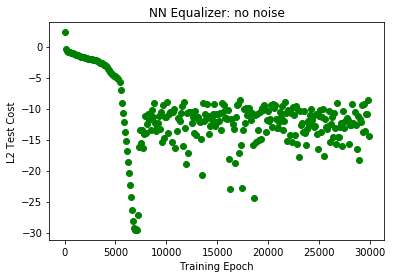

In [283]:
plt.figure()

# start the session
with tf.Session() as sess:
    #    initialize the variables
    sess.run(init_op)
    mc_losses = []
    
    for epoch in range(epochs):
        
        current_start = epoch*batch_size
        data_train_batch = data_train[current_start:(current_start+batch_size),:,:]
        start_train_batch = start_train[current_start:(current_start+batch_size),:]
        
        # begin in state of all zeros
#         begin_state = np.zeros((batch_size, state_size))
        # begin in randome state
#         begin_state = np.random.rand(batch_size,state_size)
        begin_state = start_train_batch

        _,cost,est_data_batch = sess.run([optimizer, estimation_cost, est_data_series], 
                                          feed_dict={batch_data_placeholder: data_train_batch, 
                                                     init_state: begin_state,
                                                    batch_start_placeholder: start_train_batch})    

        if epoch % 100 == 0: 
            
#             begin_state = np.random.rand(batch_size,state_size)
            begin_state = start_test
            mc_cost, mc_estimation, squared_error = sess.run([estimation_cost, est_data_series, 
                                                              squared_difference], 
                                             feed_dict={batch_data_placeholder: data_test, 
                                                        init_state: begin_state,
                                                       batch_start_placeholder: start_test})
            
            
#             plt.plot(epoch, mc_cost, 'bo')
#             plt.plot(epoch, zero_force_error, 'ro')
#             plt.plot(epoch, mse_error, 'go')
            print('Epoch {}, Train Cost {}, Test Cost: {}'.format(epoch, cost, mc_cost))
            plt.plot(epoch,np.log(cost),'go')
#             print('Epoch {}, Train Cost {}'.format(epoch, cost))
    
    
    plt.xlabel('Training Epoch')
    plt.ylabel('L2 Test Cost')
    plt.title('NN Equalizer: no noise')
    # plt.text(1000, .025, r'NN equalizer')
    # plt.text(0.5, .025, r'Zero Force equalizer')
    plt.show()
    
    

Estimation error for test point k= 93 : 1.663869095242362e-08


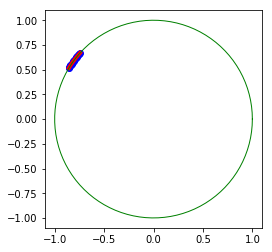

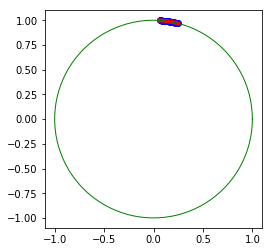

In [280]:
# visualize predictions

sum_error = 0
for i in range(num_test):
    y = ((data_test[i,:,:]-np.array(mc_estimation)[i,:,:])**2)
    sum_error = sum_error +y
#     print(((data_test[i,:,:]-np.array(mc_estimation)[i,:,:])**2).mean())


# print(sum_error/num_test)    

k=93
# print(mc_cost)
# estimation_error_k = np.linalg.norm(data_test[k,:,:]-np.array(mc_estimation)[k,:,:],2)
estimation_error_k = np.mean((data_test[k,:,:]-np.array(mc_estimation)[k,:,:])**2)
print('Estimation error for test point k=',k,':', estimation_error_k)

plt.figure()
plt.plot(np.array(mc_estimation)[k,:,0],np.array(mc_estimation)[k,:,1],color='b', marker='o')
plt.plot(data_test[k,:,0],data_test[k,:,1],color='r', linewidth=4)
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), linewidth=1, color='g')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


plt.figure()
plt.plot(np.array(est_data_batch)[k,:,0],np.array(est_data_batch)[k,:,1],color='b', marker='o')
plt.plot(data_train_batch[k,:,0],data_train_batch[k,:,1],color='r', linewidth=4)
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), linewidth=1, color='g')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

In [6]:
# print(np.array(mc_estimation)[0,:,0])
# print(data_test[0,:,0])
# print(mc_cost)

print(np.mean(squared_error))

0.9923916


# Can an RNN learn to follow a circle? New cost function

Input to RNN: starting point
output of RNN: float for next number
Cost: (e^(j*output) - real_data)^2

In [166]:
# create training data

import numpy as np
import scipy.signal as sig
from numpy import linalg as LA
import matplotlib.pyplot as plt

# Create training and test data for the NN

epochs = 5000
batch_size = 1000

num_train=epochs*batch_size
num_test=batch_size

data_length = 20
omega = 1/100 # rate of rotation, number of rotations / symbol


# QPSK
data_train = np.zeros((num_train, data_length,2))
data_test = np.zeros((num_test, data_length,2))
start_train = np.zeros((num_train, 1))
start_test = np.zeros((num_test, 1))

for i in range(num_train):
    
    # first choose a random starting point on the unit circle
    # there are 2pi radians in a circle, choose random number between 0 and 2pi
    random_start = np.random.rand()*2*np.pi
#     random_start = 0
    start_train[i] = random_start
    # real part of data
    data_train[i,0,:]=np.array([np.cos(random_start), np.sin(random_start)])
    
    # rotate data according to omega
    for j in range(1,data_length):
        data_train[i,j,0]=(data_train[i,j-1,0]*np.cos(omega)-data_train[i,j-1,1]*np.sin(omega))
        data_train[i,j,1]=(data_train[i,j-1,0]*np.sin(omega)+data_train[i,j-1,1]*np.cos(omega))
        
    if i % 100000 == 0:
        print(i)
    

for i in range(num_test):
    # first choose a random starting point on the unit circle
    # there are 2pi radians in a circle, choose random number between 0 and 2pi
    random_start = np.random.rand()*2*np.pi
#     random_start = 0 
    start_test[i]=random_start
    # real part of data
    data_test[i,0,:]=np.array([np.cos(random_start), np.sin(random_start)])
    
    # rotate data according to omega
    for j in range(1,data_length):
        data_test[i,j,0]=(data_test[i,j-1,0]*np.cos(omega)-data_test[i,j-1,1]*np.sin(omega))
        data_test[i,j,1]=(data_test[i,j-1,0]*np.sin(omega)+data_test[i,j-1,1]*np.cos(omega))

print("Data generation complete.")

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
Data generation complete.


In [170]:
import numpy as np
from numpy import linalg as LA
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
# fix random seed for reproducibility
np.random.seed()

learning_rate = 0.01
decay = 1 - 10*1e-10

state_size = 1 # state size
output_size = 1 # size of the output

batch_data_placeholder = tf.placeholder(tf.float32, [None, data_length,2])
# batch_start_placeholder = tf.placeholder(tf.float32, [None, 1])

init_state = tf.placeholder(tf.float32, [None, state_size])

# Unpack columns
data = tf.unstack(batch_data_placeholder, axis=1)

# Forward pass
current_state = init_state
est_data_series = []
for current_data in data:
    
#     input_start_state_concatenated = tf.concat([batch_start_placeholder, current_state],1) 
    
#     layer_1 = tf.layers.dense(
#       current_state, 100, tf.nn.sigmoid, use_bias=True)
#     layer_2 = tf.layers.dense(
#       layer_1, 100, tf.nn.sigmoid, use_bias=True)
#     layer_3 = tf.layers.dense(
#       layer_2, 100, tf.nn.sigmoid, use_bias=True)
#     layer_4 = tf.layers.dense(
#       layer_3, 100, tf.nn.sigmoid, use_bias=True)
    
    
#     layer_5 = tf.layers.dense(
#       layer_4, state_size, activation=tf.identity, use_bias=True)

#     layer_3 = tf.layers.dense(
#         layer_1, state_size, activation=tf.identity, use_bias=True)

    next_state = layer_5

    # take cos(next_state) and sin(next_state) as x and y coordinates
    x = tf.cos(next_state)
    y = tf.sin(next_state)
    app = tf.concat([x,y],axis=1)
    est_data_series.append(app)
#     print(est_data_series)
#     print(np.array(est_data_series).shape)
    current_state = next_state

# est_data_series = (np.transpose(np.array(est_data_series), axes=(1, 0, 2))).tolist()    

est_data_series=tf.transpose(est_data_series, perm=[1,0,2])
# estimation_cost = tf.losses.mean_squared_error(data,est_data_series)
squared_difference = tf.squared_difference(batch_data_placeholder, est_data_series)

estimation_cost = tf.reduce_mean(tf.squared_difference(batch_data_placeholder, est_data_series))

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(estimation_cost)
                                                                                  
# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

Epoch 0, Train Cost 1.0003148317337036, Test Cost: 0.9941355586051941
Epoch 100, Train Cost 0.8524659872055054, Test Cost: 0.9991777539253235
Epoch 200, Train Cost 0.7977465987205505, Test Cost: 0.9997045993804932
Epoch 300, Train Cost 0.8013573288917542, Test Cost: 1.015687108039856
Epoch 400, Train Cost 0.7743804454803467, Test Cost: 1.0024611949920654
Epoch 500, Train Cost 0.7695026397705078, Test Cost: 1.0078575611114502
Epoch 600, Train Cost 0.7582810521125793, Test Cost: 1.0010544061660767
Epoch 700, Train Cost 0.763292133808136, Test Cost: 0.9994281530380249
Epoch 800, Train Cost 0.7561063766479492, Test Cost: 1.009779930114746
Epoch 900, Train Cost 0.7652855515480042, Test Cost: 0.9945132732391357
Epoch 1000, Train Cost 0.7632288336753845, Test Cost: 1.0047279596328735
Epoch 1100, Train Cost 0.7639355659484863, Test Cost: 1.001190423965454
Epoch 1200, Train Cost 0.7419256567955017, Test Cost: 0.9892204999923706
Epoch 1300, Train Cost 0.7452003955841064, Test Cost: 0.98898553848

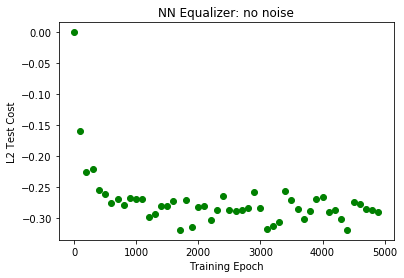

In [171]:
plt.figure()

# start the session
with tf.Session() as sess:
    #    initialize the variables
    sess.run(init_op)
    mc_losses = []
    
    for epoch in range(epochs):
        
        current_start = epoch*batch_size
        data_train_batch = data_train[current_start:(current_start+batch_size),:,:]
        start_train_batch = start_train[current_start:(current_start+batch_size)]
        
        begin_state = start_train_batch

        _,cost,est_data_batch = sess.run([optimizer, estimation_cost, est_data_series], 
                                          feed_dict={batch_data_placeholder: data_train_batch, 
                                                     init_state: begin_state})    

        if epoch % 100 == 0: 
            
            begin_state = np.random.rand(batch_size,state_size)
            mc_cost, mc_estimation = sess.run([estimation_cost, est_data_series], 
                                             feed_dict={batch_data_placeholder: data_test, 
                                                        init_state: begin_state})
            
            
#             plt.plot(epoch, mc_cost, 'bo')
#             plt.plot(epoch, zero_force_error, 'ro')
#             plt.plot(epoch, mse_error, 'go')
            print('Epoch {}, Train Cost {}, Test Cost: {}'.format(epoch, cost, mc_cost))
            plt.plot(epoch,np.log(cost),'go')
#             print('Epoch {}, Train Cost {}'.format(epoch, cost))
    
    
    plt.xlabel('Training Epoch')
    plt.ylabel('L2 Test Cost')
    plt.title('NN Equalizer: no noise')
    # plt.text(1000, .025, r'NN equalizer')
    # plt.text(0.5, .025, r'Zero Force equalizer')
    plt.show()
    

Estimation error for test point k= 97 : nan


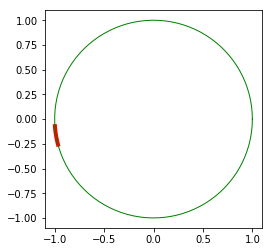

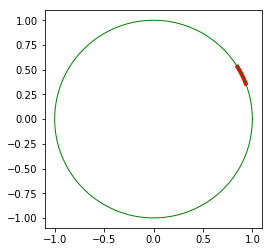

In [169]:
# visualize predictions

sum_error = 0
for i in range(num_test):
    y = ((data_test[i,:,:]-np.array(mc_estimation)[i,:,:])**2)
    sum_error = sum_error +y
#     print(((data_test[i,:,:]-np.array(mc_estimation)[i,:,:])**2).mean())


# print(sum_error/num_test)    

k=97
# print(mc_cost)
# estimation_error_k = np.linalg.norm(data_test[k,:,:]-np.array(mc_estimation)[k,:,:],2)
estimation_error_k = np.mean((data_test[k,:,:]-np.array(mc_estimation)[k,:,:])**2)
print('Estimation error for test point k=',k,':', estimation_error_k)

plt.figure()
plt.plot(np.array(mc_estimation)[k,:,0],np.array(mc_estimation)[k,:,1],color='b', marker='o')
plt.plot(data_test[k,:,0],data_test[k,:,1],color='r', linewidth=4)
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), linewidth=1, color='g')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


plt.figure()
plt.plot(np.array(est_data_batch)[k,:,0],np.array(est_data_batch)[k,:,1],color='b', marker='o')
plt.plot(data_train_batch[k,:,0],data_train_batch[k,:,1],color='r', linewidth=4)
t = np.linspace(0,np.pi*2,100)
plt.plot(np.cos(t), np.sin(t), linewidth=1, color='g')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()

## Can an RNN learn the pattern - add one - ex: 1, 2, 3   or  31, 32, 33...

## Can I force the weights of the RNN to learn a pattern?

In [62]:
# create training data

import numpy as np
import scipy.signal as sig
from numpy import linalg as LA
import matplotlib.pyplot as plt

# Create training and test data for the NN

epochs = 30000
batch_size = 1000

# number of random channels that will be trained and tested on
num_train=epochs*batch_size
num_test=batch_size

data_length = 15
increase = 2 # integer to add


# QPSK
data_train = np.zeros((num_train, data_length))
data_test = np.zeros((num_test, data_length))
start_train = np.zeros((num_train,1))
start_test = np.zeros((num_test,1))

norm_train = np.zeros((num_train,1))
norm_test = np.zeros((num_test,1))

for i in range(num_train):
    # first choose a random starting integer
    random_start = np.random.randint(low=0, high=10, size=1)
#     random_start = 0

    data_train[i,0]= random_start+increase
    
    # rotate data according to omega
    for j in range(1,data_length):
        data_train[i,j]= data_train[i,j-1] + increase
        
    # normalize the data: x - min(x)/(max(x)-min(x))
#     data_train[i,:] = (data_train[i,:]-random_start)/(data_train[i,data_length-1]-random_start)
    
    start_train[i] = data_train[i,0]
    
    if i % 100000 == 0:
        print(i)
    

for i in range(num_test):
    # first choose a random starting integer
    random_start = np.random.randint(low=0, high=10, size=1)
#     random_start = 0

    # real part of data
    data_test[i,0]= random_start+increase
    
    # rotate data according to omega
    for j in range(1,data_length):
        data_test[i,j]= data_test[i,j-1] + increase
        
    # normalize the data: x - min(x)/(max(x)-min(x))
#     data_test[i,:] = (data_test[i,:]-random_start)/(data_test[i,data_length-1]-random_start)
    
    start_test[i] = data_test[i,0]
    
print("Data generation complete.")

0
100000
200000
300000
400000
500000
600000
700000
800000
900000
1000000
1100000
1200000
1300000
1400000
1500000
1600000
1700000
1800000
1900000
2000000
2100000
2200000
2300000
2400000
2500000
2600000
2700000
2800000
2900000
3000000
3100000
3200000
3300000
3400000
3500000
3600000
3700000
3800000
3900000
4000000
4100000
4200000
4300000
4400000
4500000
4600000
4700000
4800000
4900000
5000000
5100000
5200000
5300000
5400000
5500000
5600000
5700000
5800000
5900000
6000000
6100000
6200000
6300000
6400000
6500000
6600000
6700000
6800000
6900000
7000000
7100000
7200000
7300000
7400000
7500000
7600000
7700000
7800000
7900000
8000000
8100000
8200000
8300000
8400000
8500000
8600000
8700000
8800000
8900000
9000000
9100000
9200000
9300000
9400000
9500000
9600000
9700000
9800000
9900000
10000000
10100000
10200000
10300000
10400000
10500000
10600000
10700000
10800000
10900000
11000000
11100000
11200000
11300000
11400000
11500000
11600000
11700000
11800000
11900000
12000000
12100000
12200000
12300000

In [2]:
import tensorflow as tf

delta = -0.2

w1 = ([[1+delta]])
b1 = ([[increase+delta]])

w1_init = tf.constant_initializer(w1)
b1_init = tf.constant_initializer(b1)

/home/laura/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [59]:
import numpy as np
from numpy import linalg as LA
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline
# fix random seed for reproducibility
np.random.seed()

# tf.reset_default_graph()

learning_rate = 0.1
decay = 1 - 1*1e-10

state_size = 1 # state size
output_size = 1 # size of the output

batch_data_placeholder = tf.placeholder(tf.float32, [None, data_length])
batch_start_placeholder = tf.placeholder(tf.float32, [None, 1])


init_state = tf.placeholder(tf.float32, [None, state_size])

# Unpack columns
data = tf.unstack(batch_data_placeholder, axis=1)

# Forward pass
current_state = init_state
est_data_series = []
layer_1_series=[]
for current_data in data:
        
    layer_1 = tf.layers.dense(
        current_state, 1, activation=tf.identity, use_bias=True)
#         kernel_initializer=w1_init, bias_initializer=b1_init, name='onelayer', reuse=tf.AUTO_REUSE)
    
    layer_1_series.append(tf.reshape(layer_1,[batch_size,1]))
    
    next_state = tf.reshape(layer_1,[batch_size,1])
    
    est_data_series.append(tf.reshape(layer_1,[batch_size,1]))
#     print(est_data_series)
#     print(np.array(est_data_series).shape)
    current_state = next_state

est_data_series_2 = tf.transpose(tf.reshape(est_data_series,[data_length,batch_size]))
    
estimation_cost = tf.losses.mean_squared_error(batch_data_placeholder,est_data_series_2)

# print(tf.gradients(est_data_series_2,layer_1))

optimizer = tf.train.AdamOptimizer(learning_rate).minimize(estimation_cost)
                                                                                  
# finally setup the initialisation operator
init_op = tf.global_variables_initializer()

Epoch 0, Train Cost 497.2836608886719, Test Cost: 498.1287536621094
Epoch 100, Train Cost 136.08522033691406, Test Cost: 135.58348083496094
Epoch 200, Train Cost 123.97468566894531, Test Cost: 117.50873565673828
Epoch 300, Train Cost 113.59136962890625, Test Cost: 112.80001068115234
Epoch 400, Train Cost 108.90225219726562, Test Cost: 108.41967010498047
Epoch 500, Train Cost 115.00662994384766, Test Cost: 114.6864013671875
Epoch 600, Train Cost 103.79845428466797, Test Cost: 103.67005157470703
Epoch 700, Train Cost 104.32888793945312, Test Cost: 102.27153778076172
Epoch 800, Train Cost 99.05237579345703, Test Cost: 98.45833587646484
Epoch 900, Train Cost 97.91514587402344, Test Cost: 97.70852661132812
Epoch 1000, Train Cost 96.00230407714844, Test Cost: 95.5372543334961
Epoch 1100, Train Cost 91.02989959716797, Test Cost: 90.8856201171875
Epoch 1200, Train Cost 86.36434936523438, Test Cost: 85.79611206054688
Epoch 1300, Train Cost 67.01500701904297, Test Cost: 66.7822036743164
Epoch 14

Epoch 11300, Train Cost 0.027362443506717682, Test Cost: 0.022262349724769592
Epoch 11400, Train Cost 0.021239690482616425, Test Cost: 0.026196932420134544
Epoch 11500, Train Cost 0.020045991986989975, Test Cost: 0.018321912735700607
Epoch 11600, Train Cost 0.04239135608077049, Test Cost: 0.0393839105963707
Epoch 11700, Train Cost 0.04508469998836517, Test Cost: 0.1242595762014389
Epoch 11800, Train Cost 0.018392574042081833, Test Cost: 0.042219873517751694
Epoch 11900, Train Cost 0.02632269263267517, Test Cost: 0.032362814992666245
Epoch 12000, Train Cost 0.005750098265707493, Test Cost: 0.0052471160888671875
Epoch 12100, Train Cost 0.005374656058847904, Test Cost: 0.005381301511079073
Epoch 12200, Train Cost 0.00960023794323206, Test Cost: 0.010985884815454483
Epoch 12300, Train Cost 0.2701810598373413, Test Cost: 0.3076518177986145
Epoch 12400, Train Cost 0.018656514585018158, Test Cost: 0.009119023568928242
Epoch 12500, Train Cost 0.0049590435810387135, Test Cost: 0.004749297164380

Epoch 22100, Train Cost 0.008395788259804249, Test Cost: 0.00879527535289526
Epoch 22200, Train Cost 0.0065544904209673405, Test Cost: 0.005811460316181183
Epoch 22300, Train Cost 0.006170530337840319, Test Cost: 0.005832333583384752
Epoch 22400, Train Cost 0.026322076097130775, Test Cost: 0.027700409293174744
Epoch 22500, Train Cost 0.1070043295621872, Test Cost: 0.09014492481946945
Epoch 22600, Train Cost 0.183059424161911, Test Cost: 0.2767757177352905
Epoch 22700, Train Cost 0.12786360085010529, Test Cost: 0.1413695067167282
Epoch 22800, Train Cost 0.06866641342639923, Test Cost: 0.08973944932222366
Epoch 22900, Train Cost 0.10018626600503922, Test Cost: 0.13809658586978912
Epoch 23000, Train Cost 0.01229951623827219, Test Cost: 0.0070459176786243916
Epoch 23100, Train Cost 0.6053489446640015, Test Cost: 0.590583860874176
Epoch 23200, Train Cost 0.3900229334831238, Test Cost: 0.3524634838104248
Epoch 23300, Train Cost 0.10148163884878159, Test Cost: 0.19053886830806732
Epoch 23400,

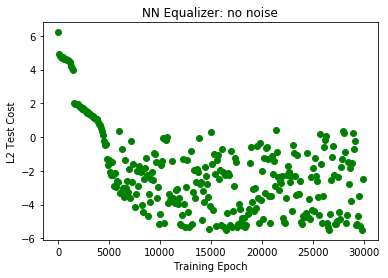

In [63]:
plt.figure()

# start the session
with tf.Session() as sess:
    #    initialize the variables
    sess.run(init_op)
    mc_losses = []
    
    for epoch in range(epochs):
        
        current_start = epoch*batch_size
        data_train_batch = data_train[current_start:(current_start+batch_size),:]
        start_train_batch = start_train[current_start:(current_start+batch_size),:]
        
        # begin in state of all zeros
#         begin_state = np.zeros((batch_size, state_size))
        # begin in random state
#         begin_state = np.random.rand(batch_size,state_size)

        begin_state = start_train_batch

        _,cost,est_data_batch = sess.run([optimizer, estimation_cost, est_data_series_2], 
                                          feed_dict={batch_data_placeholder: data_train_batch, 
                                                     init_state: begin_state,
                                                    batch_start_placeholder: start_train_batch})    

        if epoch % 100 == 0: 
            
#             begin_state = np.random.rand(batch_size,state_size)
#             begin_state = np.zeros((batch_size,state_size))
            begin_state = start_test
            mc_cost, mc_estimation, l1 = sess.run([estimation_cost, est_data_series_2, layer_1_series], 
                                             feed_dict={batch_data_placeholder: data_test, 
                                                        init_state: begin_state,
                                                       batch_start_placeholder: start_test})
            
            
#             plt.plot(epoch, mc_cost, 'bo')
#             plt.plot(epoch, zero_force_error, 'ro')
#             plt.plot(epoch, mse_error, 'go')
            print('Epoch {}, Train Cost {}, Test Cost: {}'.format(epoch, cost, mc_cost))
            plt.plot(epoch,np.log(cost),'go')
#             print('Epoch {}, Train Cost {}'.format(epoch, cost))
    
    with tf.variable_scope('onelayer', reuse=True): 
        weight1 = tf.get_variable('kernel').eval()
        bias1 = tf.get_variable('bias').eval()
    
    plt.xlabel('Training Epoch')
    plt.ylabel('L2 Test Cost')
    plt.title('NN Equalizer: no noise')
    # plt.text(1000, .025, r'NN equalizer')
    # plt.text(0.5, .025, r'Zero Force equalizer')
    plt.show()

In [65]:
k=7

print(np.array(mc_estimation)[k,:])
print(data_test[k,:])

print(np.array(mc_estimation)[k,:]-data_test[k,:])

# print(np.array(est_data_batch)[k,:])
# print(data_train[k,:])

# print(np.array(est_data_batch).shape)
# print(data_test.shape)

[ 4.9910903  7.0042305  9.021561  11.041863  13.065231  15.094739
 17.128473  19.16885   21.215706  23.270695  25.335497  27.405947
 29.488989  31.57713   33.67795  ]
[ 5.  7.  9. 11. 13. 15. 17. 19. 21. 23. 25. 27. 29. 31. 33.]
[-0.0089097   0.0042305   0.02156067  0.04186344  0.06523132  0.09473896
  0.12847328  0.16884995  0.21570587  0.27069473  0.3354969   0.40594673
  0.48898888  0.57712936  0.67795181]
